In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
activities_csv = pd.read_csv('ac_activities_garmin_clean.csv')
activities_csv.head()

,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Climb Time,Min Temp,Best Lap Time,Number of Laps
0,Running,10/29/2020 14:50,Park County Running,1.02,183,0:39:41,96,127,1.0,49,158,39:03:00,3:14,276,259,0.83,39:41:00,64.4,00:02.5,2
1,Running,10/29/2020 13:34,Park County Running,0.72,137,0:31:13,91,117,0.6,40,162,43:33:00,12:53,105,62,0.91,31:13:00,68.0,31:13.0,1
2,Running,10/27/2020 10:34,Grand County Running,2.01,224,0:35:41,110,138,1.7,91,250,17:46,5:22,217,207,1.00,35:41:00,66.2,00:06.0,3
3,Running,10/26/2020 15:12,San Juan County Running,1.89,259,0:50:17,104,129,0.9,71,225,26:38:00,13:49,213,184,0.86,50:17:00,66.2,22:53.0,2
4,Running,10/25/2020 11:27,Garfield County Running,8.43,1251,3:01:06,130,178,3.7,97,250,21:30,10:07,1739,1742,0.77,3:01:06,60.8,07:42.4,9


In [3]:
activities_csv.dtypes

Activity Type         object
Date                  object
Title                 object
Distance             float64
Calories               int64
Time                  object
Avg HR                 int64
Max HR                 int64
Aerobic TE           float64
Avg Run Cadence        int64
Max Run Cadence        int64
Avg Pace              object
Best Pace             object
Elev Gain              int64
Elev Loss              int64
Avg Stride Length    float64
Climb Time            object
Min Temp             float64
Best Lap Time         object
Number of Laps         int64
dtype: object

In [4]:
activities = activities_csv[["Activity Type", "Date", "Title", "Distance", "Calories", "Time", "Avg HR"]].copy()
activities.head()

,Activity Type,Date,Title,Distance,Calories,Time,Avg HR
0,Running,10/29/2020 14:50,Park County Running,1.02,183,0:39:41,96
1,Running,10/29/2020 13:34,Park County Running,0.72,137,0:31:13,91
2,Running,10/27/2020 10:34,Grand County Running,2.01,224,0:35:41,110
3,Running,10/26/2020 15:12,San Juan County Running,1.89,259,0:50:17,104
4,Running,10/25/2020 11:27,Garfield County Running,8.43,1251,3:01:06,130


In [5]:
activities.dtypes

Activity Type     object
Date              object
Title             object
Distance         float64
Calories           int64
Time              object
Avg HR             int64
dtype: object

In [6]:
#activities = activities.apply(pd.to_numeric,errors="coerce")
activities.dtypes

Activity Type     object
Date              object
Title             object
Distance         float64
Calories           int64
Time              object
Avg HR             int64
dtype: object

In [7]:
activities["Date"] = activities["Date"].apply(pd.to_datetime,errors="coerce")
activities["Time"] = activities["Time"].apply(pd.to_datetime,errors="coerce")
activities.dtypes

Activity Type            object
Date             datetime64[ns]
Title                    object
Distance                float64
Calories                  int64
Time             datetime64[ns]
Avg HR                    int64
dtype: object

In [8]:
X = activities[["Distance", "Avg HR", "Activity Type", "Title"]]
y = activities["Calories"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (899, 4) (899, 1)


In [9]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data, columns=["Activity Type"])
data_binary_encoded.head()

,Distance,Avg HR,Title,Activity Type_Cycling,Activity Type_Elliptical,Activity Type_Hiking,Activity Type_Running,Activity Type_Treadmill Running,Activity Type_Uncategorized
0,1.02,96,Park County Running,0,0,0,1,0,0
1,0.72,91,Park County Running,0,0,0,1,0,0
2,2.01,110,Grand County Running,0,0,0,1,0,0
3,1.89,104,San Juan County Running,0,0,0,1,0,0
4,8.43,130,Garfield County Running,0,0,0,1,0,0


In [10]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,Distance,Avg HR,Activity Type_Cycling,Activity Type_Elliptical,Activity Type_Hiking,Activity Type_Running,Activity Type_Treadmill Running,Activity Type_Uncategorized,Title_20150125,Title_Angelus Oaks Running,...,Title_Skagway Running,Title_Solana Beach Running,Title_Treadmill Running,Title_Trinidad Running,Title_Untitled,Title_Valyermo Running,Title_Washington Running,Title_White Water Running,Title_Yinchuan Running,Title_Yukon Running
300,8.02,140,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
590,6.18,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
408,8.56,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
849,18.49,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
734,4.07,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#StandardScaler

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [12]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

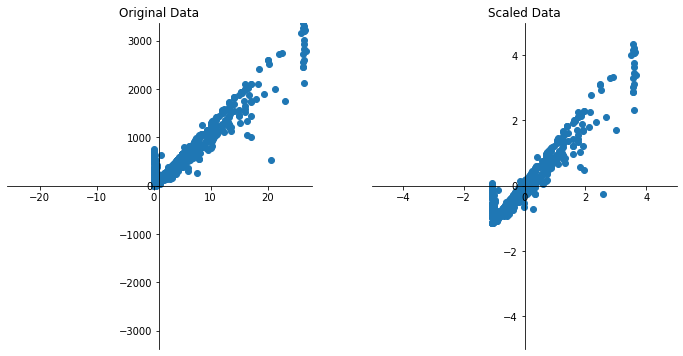

In [13]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["Distance"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-5, 5)
axes2.set_ylim(-5, 5)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["Distance"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [14]:
plt.show()

In [15]:
#Step 1) Convert Categorcial data to numbers using Integer or Binary Encoding

X = pd.get_dummies(activities[["Distance", "Avg HR", "Activity Type"]])
y = activities["Calories"].values.reshape(-1, 1)
X.head()

,Distance,Avg HR,Activity Type_Cycling,Activity Type_Elliptical,Activity Type_Hiking,Activity Type_Running,Activity Type_Treadmill Running,Activity Type_Uncategorized
0,1.02,96,0,0,0,1,0,0
1,0.72,91,0,0,0,1,0,0
2,2.01,110,0,0,0,1,0,0
3,1.89,104,0,0,0,1,0,0
4,8.43,130,0,0,0,1,0,0


In [16]:
#Step 2) Split data into training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
#Step 3) Scale or Normalize your data.  Use StandardScaler if you don't
#know anything about your data.

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

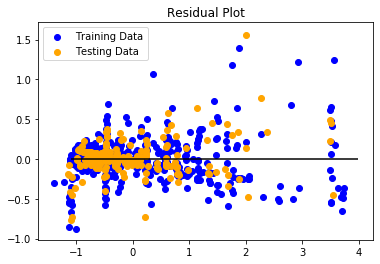

In [18]:
#Step 4) Fit the Model to the scaled training data and make preditions
#using the scaled test data

# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [19]:
#Step 5) Quantify your model using the scaled data

from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.05092787895029702, R2: 0.9312273734261288


In [20]:
#Other regression models below

In [21]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.05019815156734186, R2: 0.9322127918225571


In [22]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.05096059895970847, R2: 0.9311831885703066


In [23]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.04998578653953628, R2: 0.9324995679666978
